<center><h1>Exploring Toronto Neighborhoods</h1></center>

<h3>Data Sources</h3>

a) Differnt neighborhoods in Toronto are representented by Postal Codes.  I’m using “List of Postal code of Canada: M” (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) wiki page to get all the information about the neighborhoods present in Toronto. This page has the postal code, borough & the name of all the neighborhoods present in Toronto.

b) However, we also need the coordinates of these postal codes to search for compteting businesses.  The “https://cocl.us/Geospatial_data” csv file contains all the geographical coordinates of the neighborhoods.
We will need to merge the postal code data with the coordinates to create a dataset of all postal code, names of the neighborhood and their respective coordinates.


### Part 1
<h4>Scraping Toronto Neighborhoods Table from Wikipedia “List of Postal code of Canada: M” in order to obtain the data about the Toronto & the Neighborhoods in it.</h4>

<u> Assumptions made to attain the below DataFrame:</u>
<li>Dataframe will consist of three columns: PostalCode, Borough, and Neighborhood</li>
<li>Only the cells that have an assigned borough will be processed. Borough that is not assigned are ignored.</li>
<li>More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.</li>
<li>If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.</li>

wikipedia - package is used to scrape the data from wiki.

In [35]:
import pandas as pd
import numpy as np

In [52]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df = pd.read_html(url)

# the above code captures all the 'tables' found in the webpage and return them in a 'series'
type(df)

list

In [53]:
# if you go through the items on the list, you will see the postal code table is the first one in position[0]
df[0]

,0,1,2,3,4,5,6,7,8
0,M1A Not assigned,M2A Not assigned,M3A North York (Parkwoods),M4A North York (Victoria Village),M5A Downtown Toronto (Regent Park / Harbourfront),M6A North York (Lawrence Manor / Lawrence Heig...,M7A Queen's Park (Ontario Provincial Government),M8A Not assigned,M9A Etobicoke (Islington Avenue)
1,M1B Scarborough (Malvern / Rouge),M2B Not assigned,M3B North York (Don Mills) North,M4B East York (Parkview Hill / Woodbine Gardens),"M5B Downtown Toronto (Garden District, Ryerson)",M6B North York (Glencairn),M7B Not assigned,M8B Not assigned,M9B Etobicoke (West Deane Park / Princess Gard...
2,M1C Scarborough (Rouge Hill / Port Union / Hig...,M2C Not assigned,M3C North York (Don Mills) South (Flemingdon P...,M4C East York (Woodbine Heights),M5C Downtown Toronto (St. James Town),M6C York (Humewood-Cedarvale),M7C Not assigned,M8C Not assigned,M9C Etobicoke (Eringate / Bloordale Gardens / ...
3,M1E Scarborough (Guildwood / Morningside / Wes...,M2E Not assigned,M3E Not assigned,M4E East Toronto (The Beaches),M5E Downtown Toronto (Berczy Park),M6E York (Caledonia-Fairbanks),M7E Not assigned,M8E Not assigned,M9E Not assigned
4,M1G Scarborough (Woburn),M2G Not assigned,M3G Not assigned,M4G East York (Leaside),M5G Downtown Toronto (Central Bay Street),M6G Downtown Toronto (Christie),M7G Not assigned,M8G Not assigned,M9G Not assigned
5,M1H Scarborough (Cedarbrae),M2H North York (Hillcrest Village),M3H North York (Bathurst Manor / Wilson Height...,M4H East York (Thorncliffe Park),M5H Downtown Toronto (Richmond / Adelaide / King),M6H West Toronto (Dufferin / Dovercourt Village),M7H Not assigned,M8H Not assigned,M9H Not assigned
6,M1J Scarborough (Scarborough Village),M2J North York (Fairview / Henry Farm / Oriole),M3J North York (Northwood Park / York University),M4J East York East Toronto (The Danforth East),M5J Downtown Toronto (Harbourfront East / Unio...,M6J West Toronto (Little Portugal / Trinity),M7J Not assigned,M8J Not assigned,M9J Not assigned
7,M1K Scarborough (Kennedy Park / Ionview / East...,M2K North York (Bayview Village),M3K North York (Downsview) East (CFB Toronto),M4K East Toronto (The Danforth West / Riverdale),M5K Downtown Toronto (Toronto Dominion Centre ...,M6K West Toronto (Brockton / Parkdale Village ...,M7K Not assigned,M8K Not assigned,M9K Not assigned
8,M1L Scarborough (Golden Mile / Clairlea / Oakr...,M2L North York (York Mills / Silver Hills),M3L North York (Downsview) West,M4L East Toronto (India Bazaar / The Beaches W...,M5L Downtown Toronto (Commerce Court / Victori...,M6L North York (North Park / Maple Leaf Park /...,M7L Not assigned,M8L Not assigned,M9L North York (Humber Summit)
9,M1M Scarborough (Cliffside / Cliffcrest / Scar...,M2M North York (Willowdale / Newtonbrook),M3M North York (Downsview) Central,M4M East Toronto (Studio District),M5M North York (Bedford Park / Lawrence Manor ...,M6M York (Del Ray / Mount Dennis / Keelsdale a...,M7M Not assigned,M8M Not assigned,M9M North York (Humberlea / Emery)


In [54]:
# Flatten the DataFrame into one list (a Numpy array)

data = df[0].values.flatten()
data

array(['M1A Not assigned', 'M2A Not assigned',
       'M3A North York (Parkwoods)', 'M4A North York (Victoria Village)',
       'M5A Downtown Toronto (Regent Park / Harbourfront)',
       'M6A North York (Lawrence Manor / Lawrence Heights)',
       "M7A Queen's Park (Ontario Provincial Government)",
       'M8A Not assigned', 'M9A Etobicoke (Islington Avenue)',
       'M1B Scarborough (Malvern / Rouge)', 'M2B Not assigned',
       'M3B North York (Don Mills) North',
       'M4B East York (Parkview Hill / Woodbine Gardens)',
       'M5B Downtown Toronto (Garden District, Ryerson)',
       'M6B North York (Glencairn)', 'M7B Not assigned',
       'M8B Not assigned',
       'M9B Etobicoke (West Deane Park / Princess Gardens / Martin Grove / Islington / Cloverdale)',
       'M1C Scarborough (Rouge Hill / Port Union / Highland Creek)',
       'M2C Not assigned',
       'M3C North York (Don Mills) South (Flemingdon Park)',
       'M4C East York (Woodbine Heights)',
       'M5C Downtown Toront

In [55]:
# Split the strings in each cell into Postcode, Borough, and Neighbourhood

# hint: use for loop to loop through each item, use string slicing create a list(Postcode, Borough, and Neighbourhood) 
postcode_borough_neigh = []
for item in data:
    # Split on the first space to separate Postcode
    postcode, rest = item.split(' ', 1)
    
    # Check if there's a '(' to separate Borough and Neighbourhood
    if '(' in rest:
        # Split at the first '(' to get Borough and Neighbourhood
        borough, neighbourhood = rest.split('(', 1)
        borough = borough.strip()
        neighbourhood = neighbourhood.strip(')')  # Remove the closing ')'
    else:
        # If no neighbourhood is specified, set it to "Not assigned"
        borough = rest.strip()
        neighbourhood = "Not assigned"
    
    # Append the cleaned data to parsed_data
    postcode_borough_neigh.append([postcode, borough, neighbourhood])

display(postcode_borough_neigh)

[['M1A', 'Not assigned', 'Not assigned'],
 ['M2A', 'Not assigned', 'Not assigned'],
 ['M3A', 'North York', 'Parkwoods'],
 ['M4A', 'North York', 'Victoria Village'],
 ['M5A', 'Downtown Toronto', 'Regent Park / Harbourfront'],
 ['M6A', 'North York', 'Lawrence Manor / Lawrence Heights'],
 ['M7A', "Queen's Park", 'Ontario Provincial Government'],
 ['M8A', 'Not assigned', 'Not assigned'],
 ['M9A', 'Etobicoke', 'Islington Avenue'],
 ['M1B', 'Scarborough', 'Malvern / Rouge'],
 ['M2B', 'Not assigned', 'Not assigned'],
 ['M3B', 'North York', 'Don Mills) North'],
 ['M4B', 'East York', 'Parkview Hill / Woodbine Gardens'],
 ['M5B', 'Downtown Toronto', 'Garden District, Ryerson'],
 ['M6B', 'North York', 'Glencairn'],
 ['M7B', 'Not assigned', 'Not assigned'],
 ['M8B', 'Not assigned', 'Not assigned'],
 ['M9B',
  'Etobicoke',
  'West Deane Park / Princess Gardens / Martin Grove / Islington / Cloverdale'],
 ['M1C', 'Scarborough', 'Rouge Hill / Port Union / Highland Creek'],
 ['M2C', 'Not assigned', 'No

### if you are doing this correctly, you shall have a list of lists that looks like this:
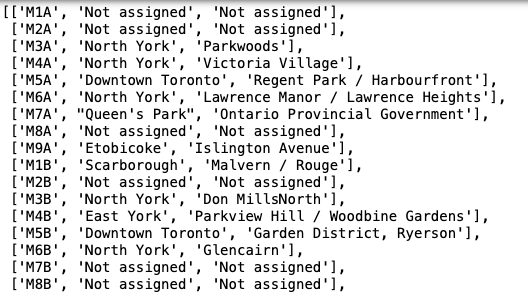

In [61]:
# Create a DataFrame from the cleaned data
columns = ['Postcode', 'Borough', 'Neighbourhood']
df = pd.DataFrame(postcode_borough_neigh, columns=columns)

# Handle multiple neighbourhoods (you can choose to keep them in the same row or split them)
# Assuming you want to handle entries with multiple neighbourhoods by leaving them as comma-separated values:
df['Neighbourhood'] = df['Neighbourhood'].str.replace(' / ', ', ')

# Display the cleaned DataFrame
# Simply use this to display the DataFrame in your local environment
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [62]:
print(df.columns)

Index(['Postcode', 'Borough', 'Neighbourhood'], dtype='object')


In [63]:
#Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
df = df[df.Borough != 'Not assigned']
df = df.rename(columns={'Postcode': 'Postalcode'})

df

,Postalcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto Business reply mail Processing Ce...,Enclave of M4L
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [64]:
# Sort data and reset index
df = df.groupby(['Borough', 'Postalcode'])['Neighbourhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()
df['Neighbourhood'] = df['Neighbourhood'].str.split(',')
df = df.explode('Neighbourhood', ignore_index=True)
df

,Borough,Postalcode,Neighbourhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,North Toronto West
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,Moore Park
...,...,...,...
211,York,M6M,Mount Dennis
212,York,M6M,Keelsdale and Silverthorn
213,York,M6N,Runnymede
214,York,M6N,The Junction North


### Part 2
<h4>Adding geographical coordinates to the neighborhoods</h4>

Next important step is adding the geographical coordinates to these neighborhoods. To do so I'm extracting the data present in the Geospatial Data csv file and I'm combining it with the existing neighborhood dataframe by merging them both based on the postal code.  

In [65]:
#Reading the latitude & longitude data from CSV file

import io
import requests

url = "https://cocl.us/Geospatial_data"
lat_long = requests.get(url).text
lat_long_df=pd.read_csv(io.StringIO(lat_long))
lat_long_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [66]:
# renaming the columns to match the existing dataframe  
lat_long_df = lat_long_df.rename(columns={'Postal Code': 'Postalcode'})
lat_long_df.head()

,Postalcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [67]:
# merging both the dataframe into one by matching on the postal code.

In [68]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df['Borough'].unique()),
        df.shape[0]
    )
)


merged_df = df.merge(lat_long_df, on='Postalcode')

merged_df.to_csv("Toronto_Neighborhoods.csv", index=False)

merged_df.head(1000)

The dataframe has 15 boroughs and 216 neighborhoods.


,Borough,Postalcode,Neighbourhood,Latitude,Longitude
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678
3,Central Toronto,M4S,Davisville,43.704324,-79.388790
4,Central Toronto,M4T,Moore Park,43.689574,-79.383160
...,...,...,...,...,...
211,York,M6M,Mount Dennis,43.691116,-79.476013
212,York,M6M,Keelsdale and Silverthorn,43.691116,-79.476013
213,York,M6N,Runnymede,43.673185,-79.487262
214,York,M6N,The Junction North,43.673185,-79.487262


### If you do this right, you shall produce a table like below:
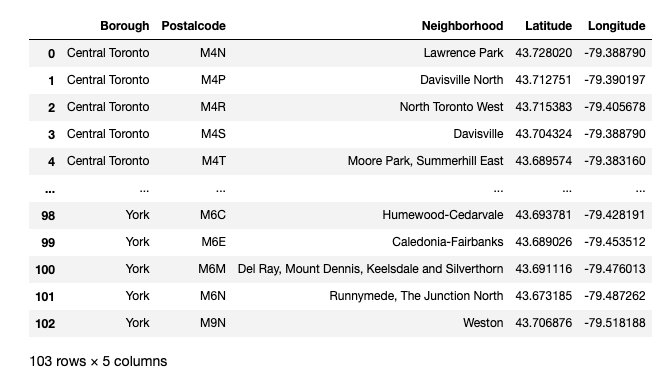

## Very important!
Save the output as a csv file.

Upload both this notebook in PDF with output AND the csv file to your GitHub repo.